In [0]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import h5py
import skimage
import matplotlib.pyplot as plt
import sys

In [0]:
%cd /content/drive/My Drive/deeplearning/2020.deeplearning/U3project/food

/content/drive/My Drive/deeplearning/2020.deeplearning/U3project/food


In [0]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # showing and rendering figures
# io related
from skimage.io import imread
import os
from glob import glob
# not needed in Kaggle, but required in Jupyter
%matplotlib inline 

In [0]:
%matplotlib inline
import os
import sys
import cv2
import numpy as np
import torch
import torch.utils.data as data
from torch.autograd import Variable
import torch.nn as nn
from torchvision import datasets, transforms
from glob import glob
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
from keras.applications.resnet50 import ResNet50
from keras.applications.resnet50 import preprocess_input
from keras.applications.vgg16 import VGG16
from keras import optimizers
from keras import applications
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.models import Sequential, Model 
from keras.layers import Dropout, Flatten, Dense, GlobalAveragePooling2D
from keras import backend as k 
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, TensorBoard, EarlyStopping
import tensorflow as tf

Using TensorFlow backend.


In [0]:
%cd /content/drive/My Drive/deeplearning/2020.deeplearning/U3project/food

/content/drive/My Drive/deeplearning/2020.deeplearning/U3project/food


In [0]:
ls

 apple_pie/                              greek_salad/
 baby_back_ribs/                         grilled_cheese_sandwich/
 baklava/                                grilled_salmon/
 beef_carpaccio/                         guacamole/
 beef_tartare/                           gyoza/
 beet_salad/                             hamburger/
 beignets/                               hot_and_sour_soup/
 best_model_todate/                      hot_dog/
 best_model_todate.data-00000-of-00001   huevos_rancheros/
 best_model_todate.index                 hummus/
 bibimbap/                               ice_cream/
 bread_pudding/                          inception_finetuned_eightclasses.model
 breakfast_burrito/                      lasagna/
 bruschetta/                             lobster_bisque/
 caesar_salad/                           lobster_roll_sandwich/
 cannoli/                                local/
 caprese_salad/                          macaroni_and_cheese/
 carrot_cake/                           

In [0]:
train_data_dir='prueba'

In [0]:
TEST_SPLIT = 0.25
epochs = 80
#batch_size = 16
batch_size=32
MICRO_DATA = True # very small subset (just 3 groups)
SAMPLE_TRAINING = False # make train set smaller for faster iteration
IMG_SIZE = (112, 112)
LEARNING_RATE = 0.001

In [0]:

train_datagen = ImageDataGenerator(rescale=1/255.,
    horizontal_flip=False,
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    validation_split=0.2) # set validation split

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=IMG_SIZE,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training') # set as training data

validation_generator = train_datagen.flow_from_directory(
    train_data_dir, # same directory as training data
    target_size=IMG_SIZE,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation') # set as validation data



Found 8037 images belonging to 10 classes.
Found 2009 images belonging to 10 classes.


In [0]:
len(model.layers)

NameError: ignored

In [0]:
#model_final.compile(loss='categorical_crossentropy', optimizer=optimizers.Adam(lr=0.00008, beta_1=0.9, beta_2=0.97, epsilon=1e-7))
#batch_size=128
from keras import applications
model =applications.Xception(weights = "imagenet", include_top=False, input_shape = (112,112,3))
for layer in model.layers[:100]:
    layer.trainable = False
regparameter=0.001
#Adding custom Layers 

x = model.output
x = Flatten()(x)
x = Dense(256, activation="relu",kernel_regularizer=tf.keras.regularizers.l1_l2(l1=regparameter,l2=regparameter))(x)
x = Dropout(0.5)(x)
x = Dense(4096, activation="relu")(x)
predictions = Dense(10, activation="softmax")(x)

# creating the final model 
model_final = Model(input = model.input, output = predictions)

# compile the model 
model_final.compile(loss = "categorical_crossentropy", optimizer = 'adam', metrics=["accuracy"])
model_final.summary()

83689472/83683744 [==============================] - 2s 0us/step
Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 112, 112, 3)  0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 55, 55, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 55, 55, 32)   128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 55, 55, 32)   0           block1_conv1_bn[0][0]            
___________________________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  app.launch_new_instance()


In [0]:
train_generator.samples// batch_size

In [0]:
chkpt = ModelCheckpoint(filepath='best_model_todate.hdf5', save_best_only=True, save_weights_only=True)

In [0]:
model_final.fit_generator(
    train_generator,
    steps_per_epoch = train_generator.samples // batch_size,
    validation_data = validation_generator, 
    validation_steps = validation_generator.samples // batch_size,
    epochs = 50,callbacks=[chkpt])

Epoch 1/50


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:724: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


 14/251 [>.............................] - ETA: 1:04:37 - loss: 32.9290 - accuracy: 0.1562

KeyboardInterrupt: ignored

In [0]:
ls

drive/  sample_data/


In [0]:
all_images = glob('/content/drive/My Drive/deeplearning/2020.deeplearning/U3project/food')


In [0]:
from collections import Counter
Counter(os.listdir())

Counter({'apple_pie': 1,
         'baby_back_ribs': 1,
         'baklava': 1,
         'beef_carpaccio': 1,
         'beef_tartare': 1,
         'beet_salad': 1,
         'beignets': 1,
         'bibimbap': 1,
         'bread_pudding': 1,
         'breakfast_burrito': 1,
         'bruschetta': 1,
         'caesar_salad': 1,
         'cannoli': 1,
         'caprese_salad': 1,
         'carrot_cake': 1,
         'ceviche': 1,
         'cheese_plate': 1,
         'cheesecake': 1,
         'chicken_curry': 1,
         'chicken_quesadilla': 1,
         'chicken_wings': 1,
         'chocolate_cake': 1,
         'chocolate_mousse': 1,
         'churros': 1,
         'clam_chowder': 1,
         'club_sandwich': 1,
         'crab_cakes': 1,
         'creme_brulee': 1,
         'croque_madame': 1,
         'cup_cakes': 1,
         'deviled_eggs': 1,
         'donuts': 1,
         'dumplings': 1,
         'edamame': 1,
         'eggs_benedict': 1,
         'escargots': 1,
         'falafel': 1,
 

En la siguiente celda se hace un df de metadata

In [0]:
#base_image_dir = os.path.join('..', 'input', 'food41')
from keras.utils.np_utils import to_categorical
from sklearn.preprocessing import LabelEncoder
all_images = glob(os.path.join('/content/drive/My Drive/deeplearning/2020.deeplearning/U3project/food', '*', '*'))
print(len(all_images), 'images found')
full_food_df = pd.DataFrame(dict(path = all_images))
food_cat = LabelEncoder()
full_food_df['category'] = full_food_df['path'].map(lambda x: x.split('/')[-2].replace('_', ' '))
food_cat.fit(full_food_df['category'].values)
full_food_df['cat_vec'] = full_food_df['category'].map(lambda x: to_categorical(food_cat.transform([x]), num_classes=len(food_cat.classes_))[0])
full_food_df.sample(3)

Using TensorFlow backend.


101542 images found


,path,category,cat_vec
9701,/content/drive/My Drive/deeplearning/2020.deep...,breakfast burrito,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
76237,/content/drive/My Drive/deeplearning/2020.deep...,pizza,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
18966,/content/drive/My Drive/deeplearning/2020.deep...,cheese plate,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [0]:
TEST_SPLIT = 0.25
epochs = 80
batch_size = 16
MICRO_DATA = True # very small subset (just 3 groups)
SAMPLE_TRAINING = False # make train set smaller for faster iteration
IMG_SIZE = (224, 244)
LEARNING_RATE = 3e-4
if MICRO_DATA:
    all_img_df = full_food_df[full_food_df['category'].isin(['samosa', 'gnocchi', 'hot dog'])]

In [0]:
all_img_df

,path,category,cat_vec
50279,/content/drive/My Drive/deeplearning/2020.deep...,gnocchi,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
50280,/content/drive/My Drive/deeplearning/2020.deep...,gnocchi,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
50281,/content/drive/My Drive/deeplearning/2020.deep...,gnocchi,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
50282,/content/drive/My Drive/deeplearning/2020.deep...,gnocchi,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
50283,/content/drive/My Drive/deeplearning/2020.deep...,gnocchi,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
...,...,...,...
86477,/content/drive/My Drive/deeplearning/2020.deep...,samosa,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
86478,/content/drive/My Drive/deeplearning/2020.deep...,samosa,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
86479,/content/drive/My Drive/deeplearning/2020.deep...,samosa,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
86480,/content/drive/My Drive/deeplearning/2020.deep...,samosa,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [0]:
from sklearn.preprocessing import LabelEncoder
cat_enc = LabelEncoder()
all_img_df['cat_idx'] = cat_enc.fit_transform(all_img_df['category'])
N_CLASSES = len(cat_enc.classes_)
# replace with random labels
all_img_df['cat_idx'] = np.random.choice(range(N_CLASSES), size=all_img_df.shape[0])
print(N_CLASSES, 'classes')
all_img_df.sample(5)

3 classes


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,path,category,cat_vec,cat_idx
85513,/content/drive/My Drive/deeplearning/2020.deep...,samosa,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0
85579,/content/drive/My Drive/deeplearning/2020.deep...,samosa,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1
58249,/content/drive/My Drive/deeplearning/2020.deep...,hot dog,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0
58279,/content/drive/My Drive/deeplearning/2020.deep...,hot dog,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0
50528,/content/drive/My Drive/deeplearning/2020.deep...,gnocchi,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1


In [0]:
from sklearn.model_selection import train_test_split
train_df, valid_df = train_test_split(full_food_df, 
                                   test_size = 0.25, 
                                   random_state = 2018,
                                   stratify = full_food_df['category'])

print('train', train_df.shape[0], 'validation', valid_df.shape[0])

train 76156 validation 25386


In [0]:
import tensorflow as tf
from keras import backend as K
from keras.applications.vgg16 import preprocess_input
import numpy as np
IMG_SIZE = (320, 320) # slightly smaller than vgg16 normally expects
def tf_image_loader(out_size, 
                      horizontal_flip = True, 
                      vertical_flip = False, 
                     random_brightness = True,
                     random_contrast = True,
                    random_saturation = True,
                    random_hue = True,
                      color_mode = 'rgb',
                       preproc_func = preprocess_input,
                       on_batch = False):
    def _func(X):
        with tf.name_scope('image_augmentation'):
            with tf.name_scope('input'):
                X = tf.image.decode_png(tf.io.read_file(X), channels = 3 if color_mode == 'rgb' else 0)
                X = tf.image.resize(X[:,:,::-1], out_size)
            with tf.name_scope('augmentation'):
                if horizontal_flip:
                    X = tf.image.random_flip_left_right(X)
                if vertical_flip:
                    X = tf.image.random_flip_up_down(X)
                if random_brightness:
                    X = tf.image.random_brightness(X, max_delta = 0.15)
                if random_saturation:
                    X = tf.image.random_saturation(X, lower = 0.5, upper = 2)
                if random_hue:
                    X = tf.image.random_hue(X, max_delta = 0.25)
                if random_contrast:
                    X = tf.image.random_contrast(X, lower = 0.75, upper = 1.5)
                return preproc_func(X)
    if on_batch: 
        # we are meant to use it on a batch
        def _batch_func(X, y):
            return tf.map_fn(_func, X), y
        return _batch_func
    else:
        # we apply it to everything
        def _all_func(X, y):
            return _func(X), y         
        return _all_func
    
def tf_augmentor(out_size,
                intermediate_size = (480, 480),
                 intermediate_trans = 'crop',
                 batch_size = 16,
                   horizontal_flip = True, 
                  vertical_flip = False, 
                 random_brightness = True,
                 random_contrast = True,
                 random_saturation = True,
                    random_hue = True,
                  color_mode = 'rgb',
                   preproc_func = preprocess_input,
                   min_crop_percent = 0.001,
                   max_crop_percent = 0.005,
                   crop_probability = 0.5,
                   rotation_range = 10):
    
    load_ops = tf_image_loader(out_size = intermediate_size, 
                               horizontal_flip=horizontal_flip, 
                               vertical_flip=vertical_flip, 
                               random_brightness = random_brightness,
                               random_contrast = random_contrast,
                               random_saturation = random_saturation,
                               random_hue = random_hue,
                               color_mode = color_mode,
                               preproc_func = preproc_func,
                               on_batch=False)
    def batch_ops(X, y):
        batch_size = tf.shape(X)[0]
        with tf.name_scope('transformation'):
            # code borrowed from https://becominghuman.ai/data-augmentation-on-gpu-in-tensorflow-13d14ecf2b19
            # The list of affine transformations that our image will go under.
            # Every element is Nx8 tensor, where N is a batch size.
            transforms = []
            identity = tf.constant([1, 0, 0, 0, 1, 0, 0, 0], dtype=tf.float32)
            if rotation_range > 0:
                angle_rad = rotation_range / 180 * np.pi
                angles = tf.random_uniform([batch_size], -angle_rad, angle_rad)
                transforms += [tf.contrib.image.angles_to_projective_transforms(angles, intermediate_size[0], intermediate_size[1])]

            if crop_probability > 0:
                crop_pct = tf.random_uniform([batch_size], min_crop_percent, max_crop_percent)
                left = tf.random_uniform([batch_size], 0, intermediate_size[0] * (1.0 - crop_pct))
                top = tf.random_uniform([batch_size], 0, intermediate_size[1] * (1.0 - crop_pct))
                crop_transform = tf.stack([
                      crop_pct,
                      tf.zeros([batch_size]), top,
                      tf.zeros([batch_size]), crop_pct, left,
                      tf.zeros([batch_size]),
                      tf.zeros([batch_size])
                  ], 1)
                coin = tf.less(tf.random_uniform([batch_size], 0, 1.0), crop_probability)
                transforms += [tf.where(coin, crop_transform, tf.tile(tf.expand_dims(identity, 0), [batch_size, 1]))]
            if len(transforms)>0:
                X = tf.contrib.image.transform(X,
                      tf.contrib.image.compose_transforms(*transforms),
                      interpolation='BILINEAR') # or 'NEAREST'
            if intermediate_trans=='scale':
                X = tf.image.resize(X, out_size)
            elif intermediate_trans=='crop':
                X = tf.image.resize_image_with_crop_or_pad(X, out_size[0], out_size[1])
            else:
                raise ValueError('Invalid Operation {}'.format(intermediate_trans))
            return X, y
    def _create_pipeline(in_ds):
        batch_ds = in_ds.map(load_ops, num_parallel_calls=4).batch(batch_size)
        return batch_ds.map(batch_ops)
    return _create_pipeline

In [0]:
def flow_from_dataframe(idg, 
                        in_df, 
                        path_col,
                        y_col, 
                        shuffle = True, 
                        color_mode = 'rgb'):
    files_ds = tf.data.Dataset.from_tensor_slices((in_df[path_col].values, 
                                                   np.stack(in_df[y_col].values,0)))
    in_len = in_df[path_col].values.shape[0]
    while True:
        if shuffle:
            files_ds = files_ds.shuffle(in_len) # shuffle the whole dataset
        
        next_batch = idg(files_ds).repeat().make_one_shot_iterator().get_next()
        for i in range(max(in_len//32,1)):
            # NOTE: if we loop here it is 'thread-safe-ish' if we loop on the outside it is completely unsafe
            yield K.get_session().run(next_batch)

In [0]:
batch_size = 128
core_idg = tf_augmentor(out_size = IMG_SIZE, 
                        color_mode = 'rgb', 
                        vertical_flip = False,
                        crop_probability=0.0, # crop doesn't work yet
                        rotation_range = 0,
                        batch_size = batch_size) 
valid_idg = tf_augmentor(out_size = IMG_SIZE, color_mode = 'rgb', 
                         crop_probability=0.0, 
                         horizontal_flip = False, 
                         vertical_flip = False, 
                         random_brightness = False,
                         random_contrast = False,
                         random_saturation = False,
                         random_hue = False,
                         rotation_range = 0,
                        batch_size = batch_size)

train_gen = flow_from_dataframe(core_idg, train_df, 
                             path_col = 'path',
                            y_col = 'cat_vec')

valid_gen = flow_from_dataframe(valid_idg, valid_df, 
                             path_col = 'path',
                            y_col = 'cat_vec') # we can use much larger batches for evaluation

NameError: ignored

In [0]:
valid_gen

<generator object flow_from_dataframe at 0x7f7c54974e60>

In [0]:
t_x, t_y = next(valid_gen)
fig, m_axs = plt.subplots(2, 4, figsize = (16, 8))
for (c_x, c_y, c_ax) in zip(t_x, t_y, m_axs.flatten()):
    c_ax.imshow(np.clip(c_x+127, 0, 255).astype(np.uint8))
    c_ax.set_title('{}'.format(food_cat.classes_[np.argmax(c_y, -1)]))
    c_ax.axis('off')

StagingError: ignored

In [0]:

class DataWrapper(data.Dataset):
    ''' Data wrapper for pytorch's data loader function '''
    def __init__(self, image_df, resize):
        self.dataset = image_df
        self.resize = resize

    def __getitem__(self, index):
        c_row = self.dataset.iloc[index]
        image_path, target = c_row['path'], c_row['cat_idx']  #image and target
        #read as rgb image, resize and convert to range 0 to 1
        image = cv2.imread(image_path, 1)
        if self.resize:
            image = cv2.resize(image, IMG_SIZE)/255.0 
        else:
            image = image/255.0
        #image = (torch.from_numpy(image.transpose(2,0,1))).float() #NxCxHxW
        return image, int(target)

    def __len__(self):
        return self.dataset.shape[0]

In [0]:
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(all_img_df, 
                                     test_size=TEST_SPLIT, 
                                     random_state=42,
                                     stratify=all_img_df['category'])

if SAMPLE_TRAINING: # make train smaller for faster testing
    train_df = train_df.\
        groupby('category').\
        apply(lambda x: x.sample(50)).\
        reset_index(drop=True).\
        sample(frac=1).\
        reset_index(drop=True)
print('train', train_df.shape[0], 'test', test_df.shape[0])

train 2268 test 756


In [0]:
train_dataset = DataWrapper(train_df, True)
train_loader = torch.utils.data.DataLoader(train_dataset,shuffle=True, 
            batch_size=batch_size, pin_memory=False)#, num_workers=4)

test_dataset = DataWrapper(test_df, True)
test_loader = torch.utils.data.DataLoader(test_dataset,shuffle=True, 
            batch_size=batch_size, pin_memory=False) #num_workers=1)

In [0]:
train_dataset = DataWrapper(train_df, True)
test_dataset = DataWrapper(test_df, True)


In [0]:
train_dataset

In [0]:
x_cifar = xdata[np.argmax(y,axis=1)!=1]    
y_cifar = y[np.argmax(y,axis=1)!= 1]  
for i in range (20,100):
    x_cifar = x_cifar[np.argmax(y_cifar,axis=1)!=i]    
    y_cifar = y_cifar[np.argmax(y_cifar,axis=1)!= i]  

In [0]:
y_cifar

array([[False, False, False, ..., False, False, False],
       [ True, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [0]:
len(np.argmax(y,axis=1))

10099

In [0]:
np.argmax(y_cifar,axis=1)

array([13,  0, 16, ..., 10, 11, 15])

In [0]:
print(x_cifar.shape)
print(y_cifar.shape)

(2051, 64, 64, 3)
(2051, 101)


In [0]:
!wget --no-cache -O init.py -q https://raw.githubusercontent.com/rramosp/2020.deeplearning/master/init.py
from init import init; init(force_download=False)
from local.lib import mlutils


replicating local resources


In [0]:
f["category_names"][33]

b'edamame'

b'foie_gras'


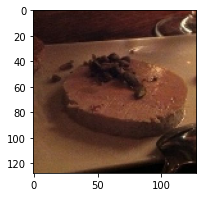

In [0]:
i=2
fig=plt.figure(figsize=(3,3))
plt.imshow(x[i])
print(f["category_names"][np.argmax(y[i])])

In [0]:
from keras.applications.resnet50 import ResNet50
from keras.applications.resnet50 import preprocess_input
from keras.applications.vgg16 import VGG16
from keras import optimizers
from keras import applications
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.models import Sequential, Model 
from keras.layers import Dropout, Flatten, Dense, GlobalAveragePooling2D
from keras import backend as k 
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, TensorBoard, EarlyStopping
import tensorflow as tf

Using TensorFlow backend.


In [0]:
model =VGG16(weights = "imagenet", include_top=False, input_shape = (224,224,3))
for layer in model.layers[:17]:
    layer.trainable = False
regparameter=0.0001
#Adding custom Layers 

x = model.output
x = Flatten()(x)
x = Dense(256, activation="relu",kernel_regularizer=tf.keras.regularizers.l1_l2(l1=regparameter,l2=regparameter))(x)
x = Dropout(0.3)(x)
x = Dense(4096, activation="relu")(x)
predictions = Dense(101, activation="softmax")(x)

# creating the final model 
model_final = Model(input = model.input, output = predictions)

# compile the model 
model_final.compile(loss = "categorical_crossentropy", optimizer = 'adam', metrics=["accuracy"])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  from ipykernel import kernelapp as app


In [0]:
model_final.summary()

Model: "model_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [0]:
#model_final.compile(loss='categorical_crossentropy', optimizer=optimizers.Adam(lr=0.00008, beta_1=0.9, beta_2=0.97, epsilon=1e-7))
#batch_size=128


model_final.fit_generator(
    train_generator,
    steps_per_epoch = train_generator.samples // batch_size,
    validation_data = validation_generator, 
    validation_steps = validation_generator.samples // batch_size,
    epochs = 20)

Epoch 1/20


/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 252 could not be retrieved. It could be because a worker has died.
  UserWarning)


ValueError: ignored

In [0]:
x1=np.array(xdata)/255.


In [0]:
model.compile(loss='categorical_crossentropy', optimizer=optimizers.Adam(lr=0.00008, beta_1=0.9, beta_2=0.97, epsilon=1e-7))
from sklearn.model_selection import train_test_split
train_x,test_x, train_y, test_y = train_test_split(x_cifar,y_cifar,test_size = 0.2)

In [0]:

model_final.fit(train_x,train_y,batch_size=128,epochs=20,validation_data=(test_x,test_y),shuffle=False)

Train on 1640 samples, validate on 411 samples
Epoch 1/20
1640/1640 [==============================] - 88s 53ms/step - loss: 9.5113 - accuracy: 0.0762 - val_loss: 6.4883 - val_accuracy: 0.1046
Epoch 2/20
1640/1640 [==============================] - 88s 54ms/step - loss: 6.7446 - accuracy: 0.1116 - val_loss: 6.4260 - val_accuracy: 0.1241
Epoch 3/20
1640/1640 [==============================] - 89s 54ms/step - loss: 6.6699 - accuracy: 0.1171 - val_loss: 6.5655 - val_accuracy: 0.1046
Epoch 4/20
1640/1640 [==============================] - 87s 53ms/step - loss: 6.7068 - accuracy: 0.1116 - val_loss: 6.1669 - val_accuracy: 0.1387
Epoch 5/20
1640/1640 [==============================] - 87s 53ms/step - loss: 6.3587 - accuracy: 0.1232 - val_loss: 6.0834 - val_accuracy: 0.1217
Epoch 6/20
1640/1640 [==============================] - 87s 53ms/step - loss: 6.2018 - accuracy: 0.1006 - val_loss: 5.9710 - val_accuracy: 0.1119
Epoch 7/20
1640/1640 [==============================] - 87s 53ms/step - loss:

NameError: ignored